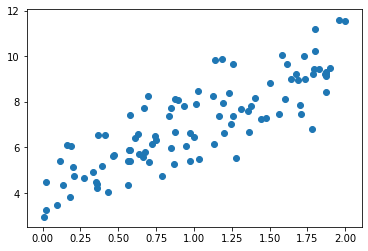

In [1]:
import numpy as np;import pandas as pd;import matplotlib.pyplot as plt
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X,y)

In [2]:
X_bias=np.c_[np.ones((100,1)),X]
theta=np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)
theta

array([[4.16204455],
       [2.86132062]])

In [3]:
X_new=np.c_[np.ones((100,1)),np.arange(100)[:,np.newaxis]]
y_new=theta.T.dot(X_new.T)

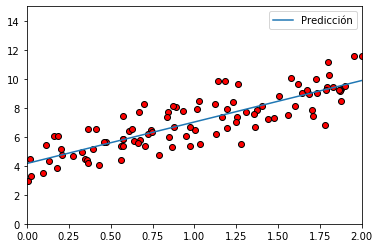

In [4]:
plt.plot(np.arange(100),y_new.T,label='Predicción')
plt.scatter(X,y,c='red',edgecolors='black')
plt.xlim(0,2)
plt.ylim(0,15)
plt.legend()

###### Este fue el resultado usando La ecuación normal para encontrar el valor de theta que minimiza la funcion de costo MSE para el modelo de regresión lineal.

[0, 2, 0, 15]

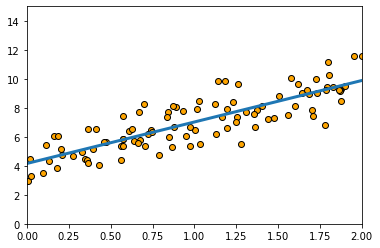

In [5]:
from sklearn.linear_model import LinearRegression
modelo=LinearRegression()
modelo.fit(X,y)
X_test=np.arange(100)
y_pred=modelo.predict(X_test[:,np.newaxis])
plt.scatter(X,y,c='orange',edgecolors='black')
plt.plot(X_test,y_pred,linewidth=3,label='Predicción')
plt.axis([0,2,0,15])

##### Acorde a las dos figuras se ve como se obtiene los mismos resultados calculados a través del calculo de la ecuación normal y apartir de las herramientas proporcionadas por la librería Scikit-learn


# BACTH GRADIENT DESCENT

In [6]:
theta=np.random.randn(2,1)
learning_rate=0.1
iteraciones=1000

for iteracion in range(iteraciones):
    gradiente=(2/100)*X_bias.T.dot(X_bias.dot(theta)-y)
    theta=theta-learning_rate*gradiente

theta

array([[4.16204455],
       [2.86132062]])

##### Se observa como a través del algoritmo BATCH GRADIENT DESCENT se obtienen los mismos parametros que minimizan la función de costo de la regresión líneal


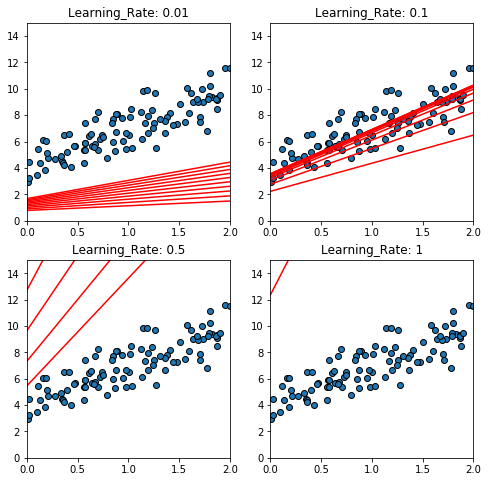

In [7]:
from itertools import product
X_new=np.c_[np.ones((100,1)),np.arange(100)[:,np.newaxis]]
learning_rate=[0.01,0.1,0.5,1]

fig,ax=plt.subplots(2,2,figsize=(8,8))
iteraciones=10;
cuenta=0;

for index in product([0,1],[0,1]):
    ax[index[0],index[1]].scatter(X,y,edgecolors='black')
    ax[index[0],index[1]].set_title(f'Learning_Rate: {learning_rate[cuenta]}')
    ax[index[0],index[1]].set_xlim(0,2)
    ax[index[0],index[1]].set_ylim(0,15)
    
    theta=np.random.randn(2,1)
    for _ in range(iteraciones):
        
        gradiente=(2/100)*X_bias.T.dot(X_bias.dot(theta)-y)
        theta=theta-learning_rate[cuenta]*gradiente
        y_new=theta.T.dot(X_new.T)
        ax[index[0],index[1]].plot(np.arange(100),y_new.T,c='red')
    
    cuenta=cuenta+1


##### En el grupo de gráficas anterior se observa la convergencia del algoritmo para diferentes valores del learning rate en las primeras 10 iteraciones. Se ve como para valores pequeños no se alcanza convergencia (aunque eventualmente se alcance para un número mayor de iteraciones). Por otro lado para valores grandes no se observa covergencia evidente y este caso lo más probable es que no se obtenga ninguna combinación óptima de parametros. La convergencia se alcanza rápidamente con un learning rate de 0.1 como se evidencia en la figura superior derecha.

# Stochastic Gradient Descent 

array([[4.14874666],
       [2.81115972]])

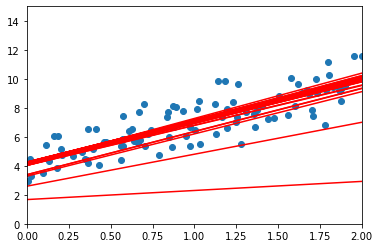

In [31]:
epochs=50
t0, t1 = 5, 50
m=100
def learning_schedule(t):
    return t0/(t+t1)

theta=np.random.randn(2,1);
plt.scatter(X,y)
for epoch in range(epochs):
    for i in range(m):
        index=np.random.randint(m)
        X_train=X_bias[index:index+1]
        y_train=y[index:index+1]
        gradiente=(2)*X_train.T.dot(X_train.dot(theta)-y_train)
        learning_rate=learning_schedule(epoch * m + i)
        theta=theta-learning_rate*gradiente
        y_new=theta.T.dot(X_new.T)
        if(epoch<10 and i<5):
            plt.plot(np.arange(100),y_new.T,c='red')
            plt.axis([0,2,0,15])
theta

##### Se observa como se obtiene un resultado similiar a los ya antes obtenidos para la variable theta (Datos que para el modelo de regresión lineal representan la pendiente y el intercepto del modelo lineal). Este valor se obtiene con un menor número de iteraciones sobre el conjunto de datos, que en este caso viene dado por la variable epochs.